In [40]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Advertising

In [41]:
data=pd.read_csv(r"C:\Users\KIIT\Downloads\advertising.csv")

In [42]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [43]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [44]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [45]:
for i in ['TV','Newspaper']:
    print(i,':','\n',data[i].unique())

TV : 
 [230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7  53.5
 261.3 239.3 102.7 131.1  69.   31.5 139.3 216.8 199.1 109.8  26.8 129.4
 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4 213.5 193.2
  76.3 110.7  88.3 134.3  28.6 217.7 250.9 107.4 163.3 197.6 184.9 289.7
 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4  13.1 255.4 225.8
 241.7 175.7 209.6  78.2  75.1 139.2 125.7  19.4 141.3  18.8 224.  123.1
 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2   8.4 219.8  36.9  48.3
  25.6 273.7  43.   73.4 193.7 220.5 104.6  96.2 140.3 243.2  38.   44.7
 280.7 121.  171.3 187.8   4.1  93.9 149.8  11.7 131.7 172.5  85.7 188.4
 163.5 117.2 234.5  17.9 206.8 215.4 284.3  

In [46]:
for value in ['TV','Radio']:
    print(value,":",sum(data[value]=='?'))

TV : 0
Radio : 0


In [47]:
d=data.corr()

<Axes: >

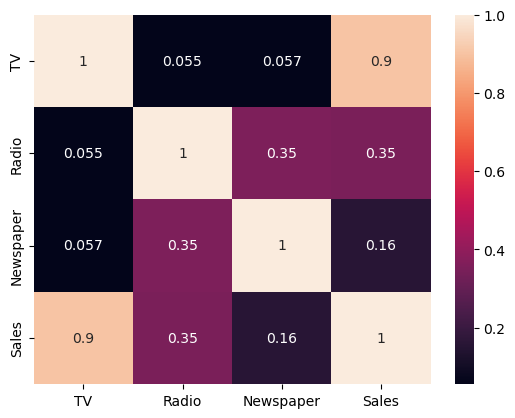

In [48]:
sns.heatmap(d,annot=True)

<Axes: xlabel='Radio', ylabel='Newspaper'>

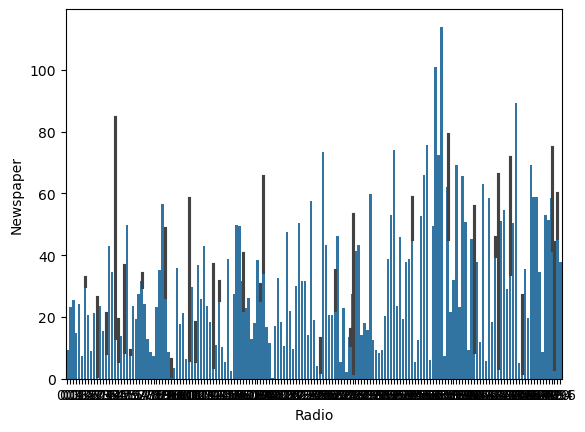

In [49]:
sns.barplot(data=data,x='Radio',y='Newspaper')

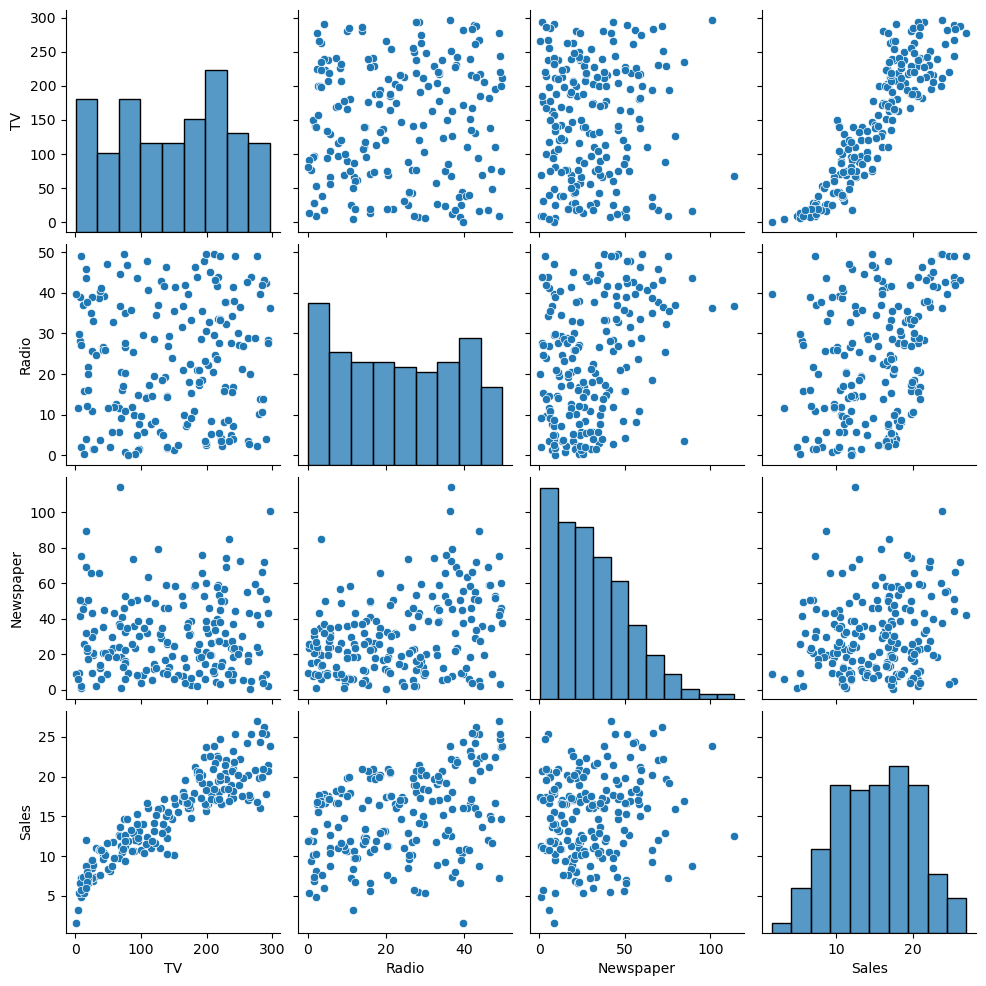

In [50]:
sns.pairplot(data)

<Axes: xlabel='TV', ylabel='Newspaper'>

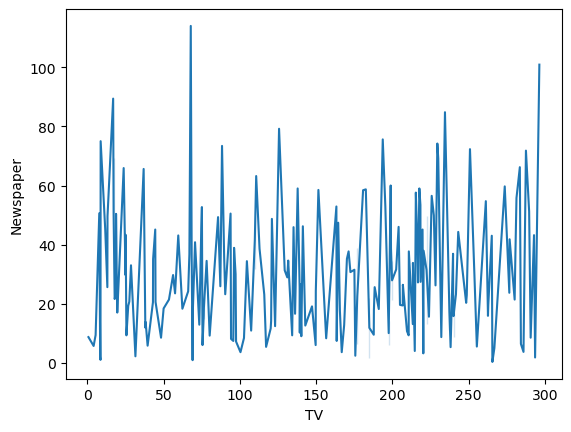

In [51]:
sns.lineplot(data=data,x=data.TV,y=data.Newspaper)

<Axes: xlabel='Radio', ylabel='Newspaper'>

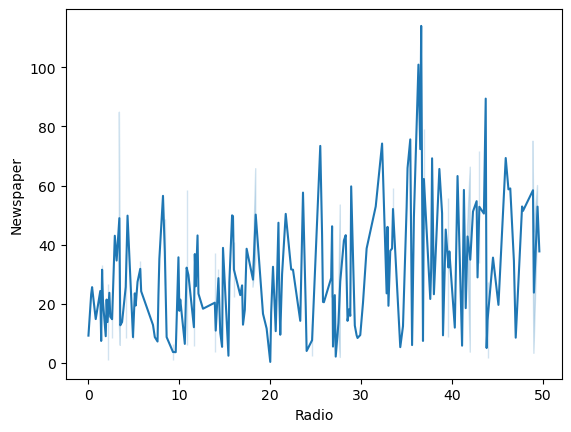

In [52]:
sns.lineplot(data=data,x=data.Radio,y=data.Newspaper)

<Axes: xlabel='Newspaper', ylabel='Sales'>

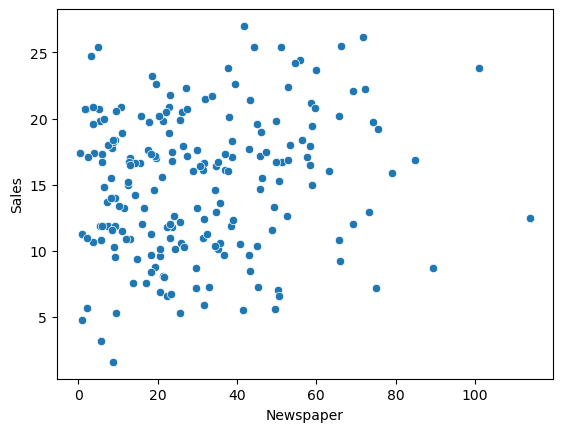

In [54]:
sns.scatterplot(x=data.Newspaper,y=data.Sales)

<Axes: xlabel='Radio', ylabel='Sales'>

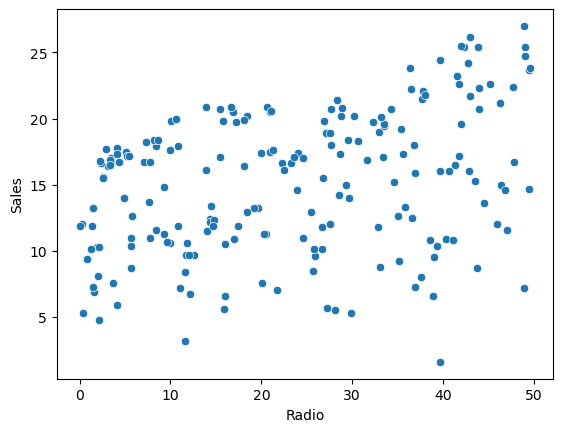

In [56]:
sns.scatterplot(x=data.Radio,y=data.Sales)


<Axes: xlabel='TV', ylabel='Radio'>

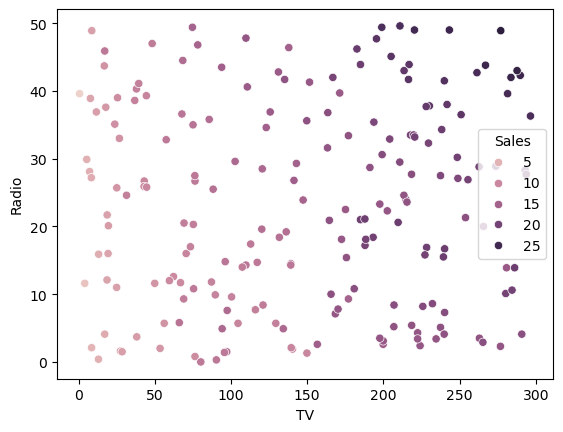

In [59]:
sns.scatterplot(x=data.TV,y=data.Radio,hue=data.Sales)

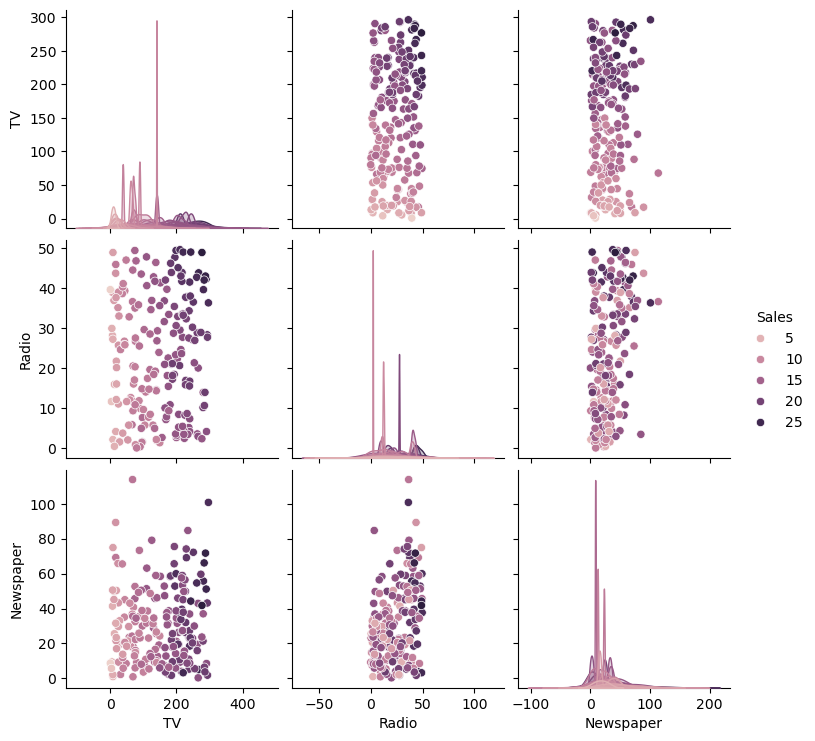

In [60]:
sns.pairplot(data,hue='Sales')

In [62]:
ip=data.drop('Sales',axis=1)
op=data.Sales

In [63]:
ip.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [64]:
op.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.2)


In [67]:
x_train

,TV,Radio,Newspaper
107,90.4,0.3,23.2
65,69.0,9.3,0.9
158,11.7,36.9,45.2
41,177.0,33.4,38.7
10,66.1,5.8,24.2
...,...,...,...
199,232.1,8.6,8.7
27,240.1,16.7,22.9
184,253.8,21.3,30.0
26,142.9,29.3,12.6


In [68]:
x_train.shape

(160, 3)

In [69]:
# standard scalar transform
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [70]:
x_train

array([[-0.676155  , -1.53691609, -0.34431787],
       [-0.92330256, -0.93035507, -1.43857826],
       [-1.58505746,  0.92976536,  0.73522154],
       [ 0.32398417,  0.69388052,  0.41626671],
       [-0.95679451, -1.16623991, -0.29524789],
       [-0.44171129,  1.17912933,  1.61848105],
       [-0.12757982,  1.57002421,  1.41238716],
       [ 1.31372929,  0.38386045, -0.70252867],
       [ 0.57921599,  0.50517265,  0.41626671],
       [-0.93023193,  1.44197244,  0.2641498 ],
       [ 0.80326564, -1.19319818, -0.13822398],
       [-0.11256618, -0.59337673, -0.22654993],
       [-1.43030151,  0.17493388,  0.64198859],
       [-0.2985043 ,  0.77475533, -0.87427357],
       [ 1.60129817,  1.34087894,  2.04048281],
       [-0.83899521,  0.29624608, -0.69762167],
       [-1.07112913, -1.17297948, -0.02536304],
       [ 1.4754146 , -1.40212475, -0.31978288],
       [-0.7939543 , -1.55713479, -1.03129748],
       [-1.0318627 , -0.74838677,  0.63217459],
       [ 0.16807333,  0.92302579, -1.119

In [71]:
from sklearn.linear_model import LinearRegression
alg=LinearRegression()
alg.fit(x_train,y_train)

LinearRegression()

In [72]:
yp=alg.predict(x_test)

In [73]:
yp

array([10.74148976, 16.22908219, 22.18328316, 10.65340867, 11.27049329,
       10.55602283,  5.49456075, 17.50380131, 21.54244629, 16.10804175,
       21.41350444, 10.60683628,  9.98604876,  7.29690491,  8.70332193,
       14.20674379, 12.50869442, 19.5209964 , 23.61296034, 13.49380105,
       13.40710366, 12.74975502, 24.33213854, 25.9914934 , 12.77337153,
       11.79701765,  9.50983076, 19.62002329, 11.1551827 , 15.70919789,
       21.64405483,  5.22159672, 18.54081741, 17.08999298, 16.48282353,
       12.17986118, 25.12325886, 18.68735946, 14.40776726, 17.69491101])

In [74]:
df=pd.DataFrame({'y':list(y_test),'prediction':yp})

In [75]:
df

,y,prediction
0,12.0,10.741490
1,16.7,16.229082
2,24.7,22.183283
3,8.7,10.653409
4,10.7,11.270493
5,10.9,10.556023
6,5.3,5.494561
7,20.6,17.503801
8,19.7,21.542446
9,15.9,16.108042


In [76]:
#accuracy
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,yp)
r2=r2_score(y_test,yp)

In [77]:
print(mse)
print(r2)

2.1373511074945695
0.9287210907518487


In [78]:
print('m',alg.coef_
    )
print(' c',alg.intercept_)

m [4.65624619 1.50819666 0.20364867]
 c 15.19375


# titanic

In [18]:
data=pd.read_csv(r"C:\Users\KIIT\Downloads\titanic dataset.csv")

In [20]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
data1=data.describe(include='all')
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [24]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [25]:
for value in ['Age']:
    data[value].fillna(data1[value][4],inplace=True)

In [26]:
for value in ['Cabin','Embarked']:
    data[value].fillna(data1[value][2],inplace=True)

In [27]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
data2